# Quantitative Lens on Tariffs: DCF, Repricing, and Reoptimization

This notebook explores how tariffs impact company valuation using a simplified DCF model. We show that while equity prices may drop due to higher costs (policy shock), long-term value can recover or even exceed the original path as firms reoptimize.

The key insight: **Tariffs create short-term constraints that traders price in quickly. But companies optimize around constraints — and the resulting value gap can offer alpha**.


## Step 1: Baseline DCF (No Tariffs)

We'll model a fictional lemonade stand with the following:

- Revenue: \$100 per year
- Costs: \$60 per year
- Cash Flow = \$40 per year
- Discount Rate: 10%
- Time Horizon: 10 years
- Terminal Value: Constant perpetuity from Year 11

We'll calculate and visualize:
- Present Value (PV) of each year's cash flow
- PV of the terminal value

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Base case parameters
years = np.arange(1, 11)
discount_rate = 0.10
revenue = 100
cost = 60
cash_flow = revenue - cost

# Cash flows and terminal value
base_cash_flows = np.full(10, cash_flow)
terminal_value = cash_flow / discount_rate
terminal_value_pv = terminal_value / (1 + discount_rate) ** 10
pv_cash_flows = np.array([cf / (1 + discount_rate) ** t for t, cf in enumerate(base_cash_flows, 1)])

print(f"PV of cash flows: ${pv_cash_flows.sum():.2f}")
print(f"PV of terminal value: ${terminal_value_pv:.2f}")
print(f"Total equity value: ${pv_cash_flows.sum() + terminal_value_pv:.2f}")

PV of cash flows: $245.78
PV of terminal value: $154.22
Total equity value: $400.00


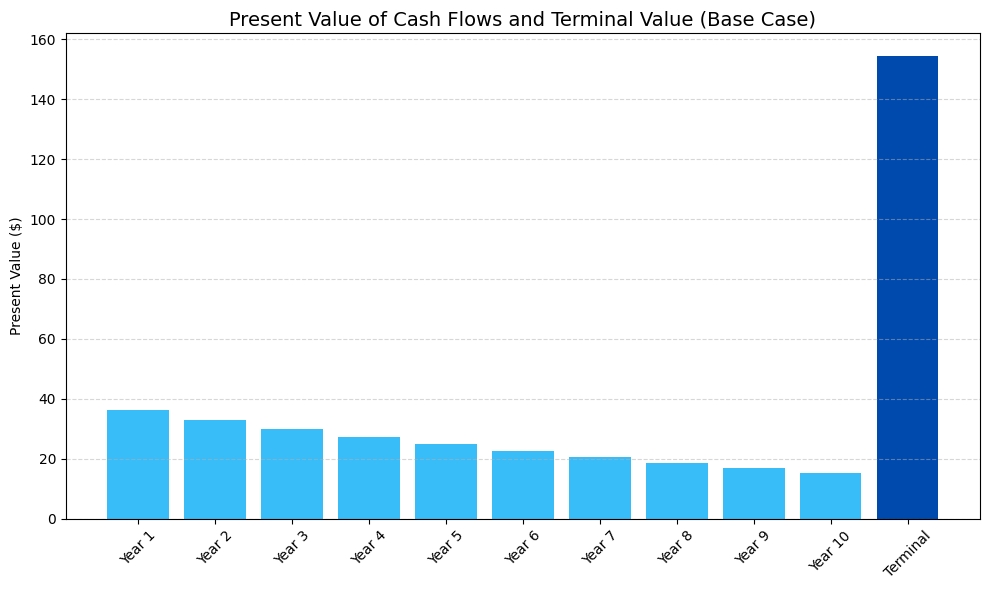

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
years = np.arange(1, 11)
discount_rate = 0.10
revenue = 100
cost = 60
cash_flow = revenue - cost

# Base case cash flows
base_cash_flows = np.full(10, cash_flow)

# Terminal value
terminal_value = cash_flow / discount_rate
terminal_value_pv = terminal_value / (1 + discount_rate) ** 10

# Present value of cash flows
pv_cash_flows = np.array([cf / (1 + discount_rate) ** t for t, cf in enumerate(base_cash_flows, 1)])

# QuantGuild color scheme
# QuantGuild color scheme
blue = '#004aad'
light_blue = '#38bdf8'

# Bar chart: each year's PV + terminal value
labels = [f'Year {i}' for i in range(1, 11)] + ['Terminal']
values = list(pv_cash_flows) + [terminal_value_pv]
colors = [light_blue] * 10 + [blue]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=colors)
plt.title("Present Value of Cash Flows and Terminal Value (Base Case)", fontsize=14)
plt.ylabel("Present Value ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Step 3: Introducing Tariffs and Reoptimization

Let's now introduce a policy shock:

- Years 1–3: Tariffs increase costs to \\$75 → Cash Flow = \\$25
- Years 4–10: Company reoptimizes → Costs fall to \\$58 → Cash Flow = \\$42
- Terminal Value is based on \\$42 cash flows

We'll recalculate the DCF and compare valuation structure.

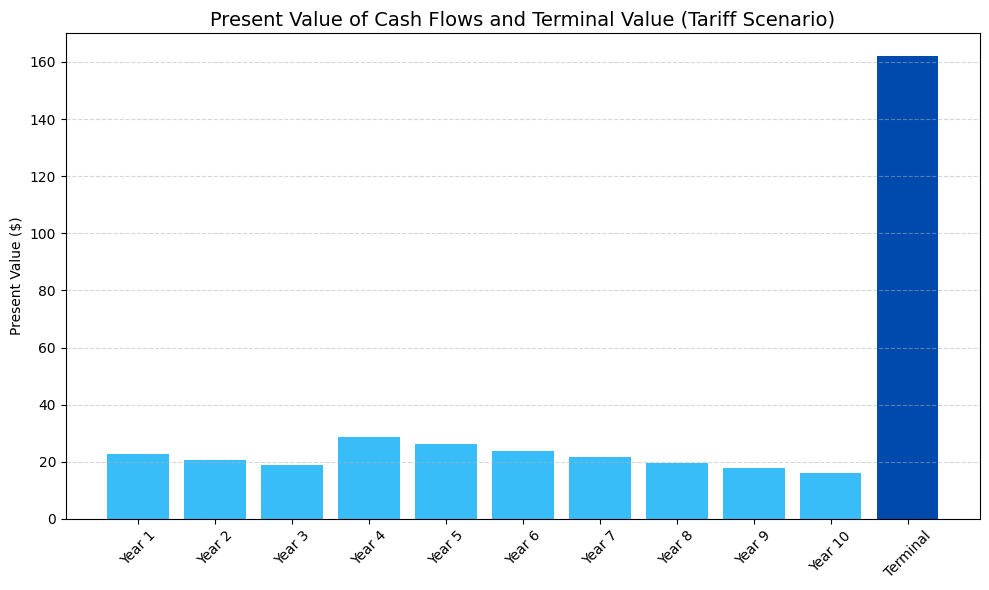

PV of cash flows: $215.80
PV of terminal value: $161.93
Total equity value (with tariffs): $377.72


In [3]:
# New cash flows under tariff + optimization
tariff_cash_flows = np.concatenate([
    np.full(3, revenue - 75),  # Years 1–3: high cost
    np.full(7, revenue - 58)   # Years 4–10: optimized cost
])
new_terminal_cf = revenue - 58
new_terminal_value = new_terminal_cf / discount_rate
new_terminal_value_pv = new_terminal_value / (1 + discount_rate) ** 10
pv_tariff_cash_flows = np.array([cf / (1 + discount_rate) ** t for t, cf in enumerate(tariff_cash_flows, 1)])

# Labels and values
labels = [f'Year {i}' for i in range(1, 11)] + ['Terminal']
values = list(pv_tariff_cash_flows) + [new_terminal_value_pv]
colors = [light_blue] * 10 + [blue]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=colors)
plt.title("Present Value of Cash Flows and Terminal Value (Tariff Scenario)", fontsize=14)
plt.ylabel("Present Value ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"PV of cash flows: ${pv_tariff_cash_flows.sum():.2f}")
print(f"PV of terminal value: ${new_terminal_value_pv:.2f}")
print(f"Total equity value (with tariffs): ${pv_tariff_cash_flows.sum() + new_terminal_value_pv:.2f}")

## Step 4: Stock Price Repricing and Recovery

We'll now simulate stock price behavior to reflect market dynamics:

- A sudden drop when tariffs are imposed
- Gradual recovery as the firm reoptimizes
- Final outperformance vs base case

This models a **value gap** created by short-term overreaction.

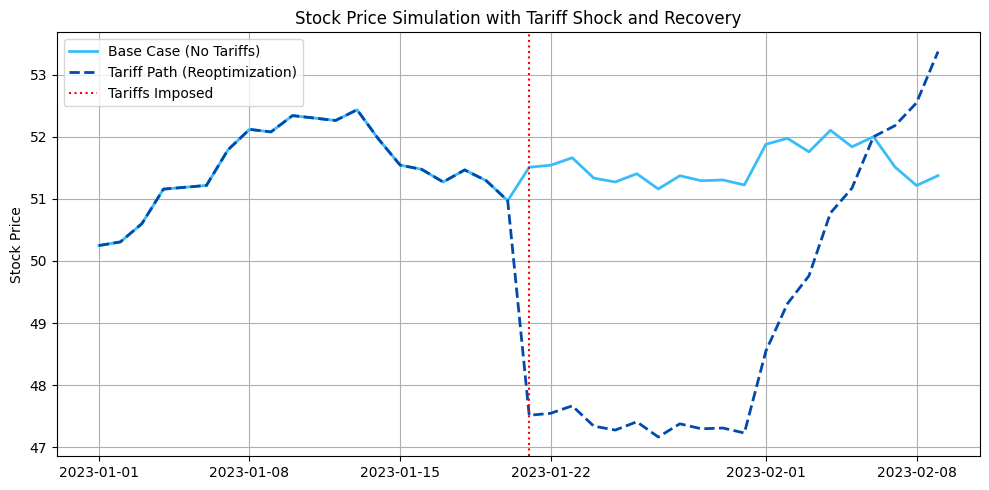

In [4]:
import pandas as pd

# Generate simulated stock prices
np.random.seed(42)
dates = pd.date_range("2023-01-01", periods=40)
base_path = 50 + np.cumsum(np.random.normal(0.1, 0.3, size=40))

# Tariff path: drop at day 20, then recover and exceed
tariff_path = base_path.copy()
tariff_path[20:] -= 4  # Shock
tariff_path[30:] += np.linspace(0, 6, 10)  # Reoptimization reward

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(dates, base_path, label="Base Case (No Tariffs)", linewidth=2, color=light_blue)
plt.plot(dates, tariff_path, label="Tariff Path (Reoptimization)", linewidth=2, color=blue, linestyle='--')
plt.axvline(dates[20], color='red', linestyle=':', label='Tariffs Imposed')
plt.title("Stock Price Simulation with Tariff Shock and Recovery")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Key Takeaways

- Tariffs cause a **short-term valuation shock** due to higher costs.
- Markets react quickly — sometimes overreact — to these shocks.
- Companies that **reoptimize efficiently** can recover value over time.
- This creates a **value gap** that quantitative traders can model and act on.

Understanding these dynamics is critical for alpha generation in politically sensitive or policy-constrained markets.
